In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font="IPAexGothic",style="white")

データを読み込む

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
print("Train:",train.shape, "Test:",test.shape)

Train: (27128, 18) Test: (18083, 17)


データを見る

In [3]:
test.describe(include='all')
test.head(3)

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1,30,management,single,tertiary,no,1028,no,no,cellular,4,feb,1294,2,-1,0,unknown
1,2,39,self-employed,single,tertiary,no,426,no,no,unknown,18,jun,1029,1,-1,0,unknown
2,3,38,technician,single,tertiary,no,-572,yes,yes,unknown,5,jun,26,24,-1,0,unknown


データの相関を見る

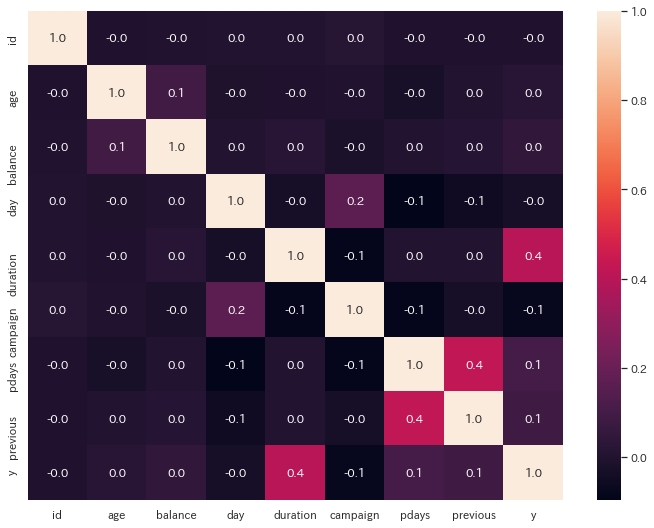

In [4]:
fig, ax = plt.subplots(figsize=(12, 9)) 
sns.heatmap(train.corr(), annot=True, fmt='.1f')

年代別で口座開設率を見てみる →　10代、60代以上が高い

(10, 20]    0.350000
(20, 30]    0.158174
(30, 40]    0.104821
(40, 50]    0.089597
(50, 60]    0.099511
(60, 70]    0.406619
(70, 80]    0.449339
(80, 90]    0.400000
Name: age, dtype: float64

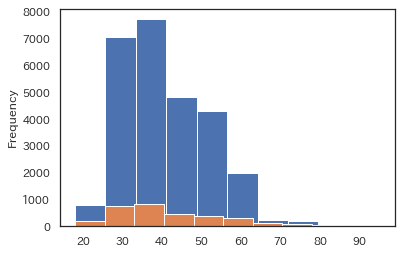

In [5]:
age_bining = pd.cut(train.age,list(range(10,100,10))) #10歳ごとにビニング
age_bining_open = pd.cut(train[train.y==1].age,list(range(10,100,10)))
age_bining_per=age_bining_open.value_counts()/age_bining.value_counts()
ax=train.age.plot.hist()
train[train.y==1].age.plot.hist()
age_bining_per

職業別で口座開設率を見てみる　→　学生、リタイアが多い　→　年代別と特徴が被る

student          0.298025
retired          0.223580
unemployed       0.164557
management       0.136477
admin.           0.124797
self-employed    0.123810
technician       0.106435
unknown          0.101124
services         0.089385
housemaid        0.088889
entrepreneur     0.087527
blue-collar      0.073055
Name: job, dtype: float64

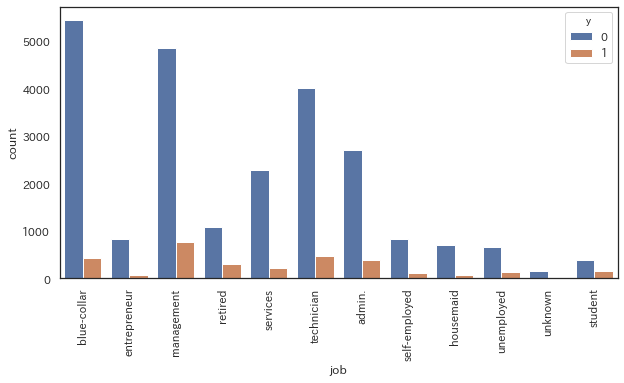

In [6]:
job_per=train[train.y==1].job.value_counts()/train.job.value_counts()
fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.countplot(x="job",hue="y",data=train)
plt.xticks(rotation=90)
job_per.sort_values(ascending=False)

各年代、職種に対する口座開設率を見てみる　→　20代以下の学生 or 60代以上のサービス業/不明以外が高い

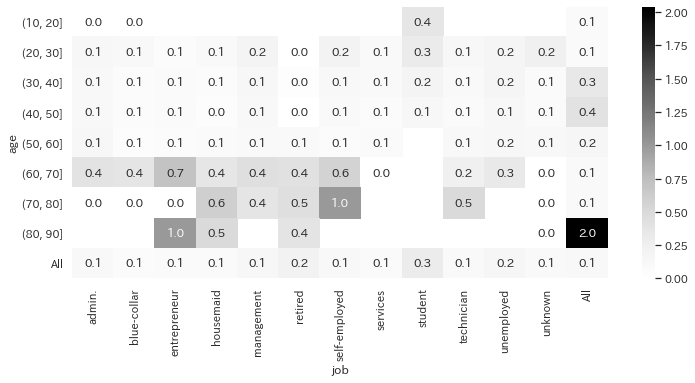

In [7]:
age_job = pd.crosstab(age_bining,train['job'],margins=True) #各年代の全体数
age_job_open = pd.crosstab(age_bining,train[train.y==1]['job'],margins=True) #各年代に対して口座開設者が何人いるか
graph = age_job_open/age_job #全体数を口座開設者で割る
plt.figure(figsize=(12,5))
heat_map = sns.heatmap(graph, cmap='Greys', annot=True, fmt='.1f');

月ごとの口座開設率を見てみる　→　3,12,9,10月が高い

mar    0.508361
dec    0.492308
sep    0.452247
oct    0.437358
apr    0.192023
feb    0.162673
aug    0.114309
jun    0.101124
nov    0.100342
jan    0.099291
jul    0.090909
may    0.068053
Name: month, dtype: float64


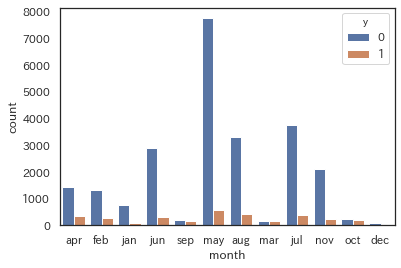

In [8]:
month_per=train[train.y==1].month.value_counts()/train.month.value_counts()
sns.countplot(x="month",hue="y",data=train)
print(month_per.sort_values(ascending=False))

最終接触時間を見る　→　長いほど確率が上がる

count    27128.000000
mean       260.711295
std        260.091727
min          0.000000
25%        104.000000
50%        182.000000
75%        323.000000
max       4918.000000
Name: duration, dtype: float64


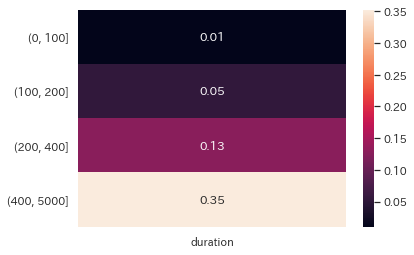

In [9]:
print(train.duration.describe())
duration_bining = pd.cut(train.duration, [0,100,200,400,5000])
duration_bining_open = pd.cut(train[train.y==1].duration, [0,100,200,400,5000]) 
duration_bining_per=duration_bining_open.value_counts()/duration_bining.value_counts()
#duration_bining_per
sns.heatmap(pd.DataFrame(duration_bining_per), annot=True, fmt='.2f')

前回キャンペーンで接触してからの日数を見る　→　100日以内に接触すると確率高い

count    27128.000000
mean        40.528052
std        100.382462
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64


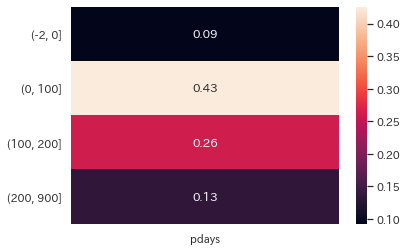

In [10]:
print(train.pdays.describe())
pdays_bining = pd.cut(train.pdays, [-2,0,100,200,900])
pdays_bining_open = pd.cut(train[train.y==1].pdays, [-2,0,100,200,900]) 
pdays_bining_per=pdays_bining_open.value_counts()/pdays_bining.value_counts()
#pdays_bining_per
sns.heatmap(pd.DataFrame(pdays_bining_per), annot=True, fmt='.2f')

残高を見る　→　100以下の確率低い

count     27128.000000
mean       1355.800870
std        3003.305272
min       -6847.000000
25%          72.000000
50%         449.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64


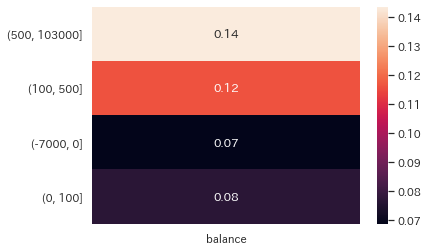

In [11]:
print(train.balance.describe() )
balance_bining = pd.cut(train.balance, [-7000,0,100,500,103000]) 
balance_bining_open = pd.cut(train[train.y==1].balance, [-7000,0,100,500,103000]) 
balance_bining_per=balance_bining_open.value_counts()/balance_bining.value_counts()
#balance_bining_per
sns.heatmap(pd.DataFrame(balance_bining_per), annot=True, fmt='.2f') 

現キャンペーンにおける接触回数を見る　→　余り影響なさげ

count    27128.000000
mean         2.751769
std          3.126594
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64


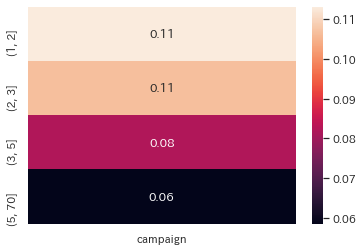

In [12]:
print(train.campaign.describe() )
campaign_bining = pd.cut(train.campaign, [1,2,3,5,70]) 
campaign_bining_open = pd.cut(train[train.y==1].campaign, [1,2,3,5,70]) 
campaign_bining_per=campaign_bining_open.value_counts()/campaign_bining.value_counts()
#campaign_bining_per
sns.heatmap(pd.DataFrame(campaign_bining_per), annot=True, fmt='.2f') 

現キャンペーン以前までに顧客に接触した回数を見る　→　余り影響なさげ

count    27128.000000
mean         0.579733
std          2.503653
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64


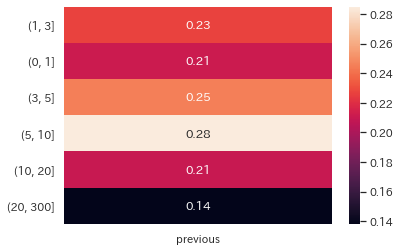

In [13]:
print(train.previous.describe() )
previous_bining = pd.cut(train.previous, [0,1,3,5,10,20,300]) 
previous_bining_open = pd.cut(train[train.y==1].previous, [0,1,3,5,10,20,300]) 
previous_bining_per=previous_bining_open.value_counts()/previous_bining.value_counts()
#previous_bining_per
sns.heatmap(pd.DataFrame(previous_bining_per), annot=True, fmt='.2f') 

object列と口座開設有無の傾向を見る

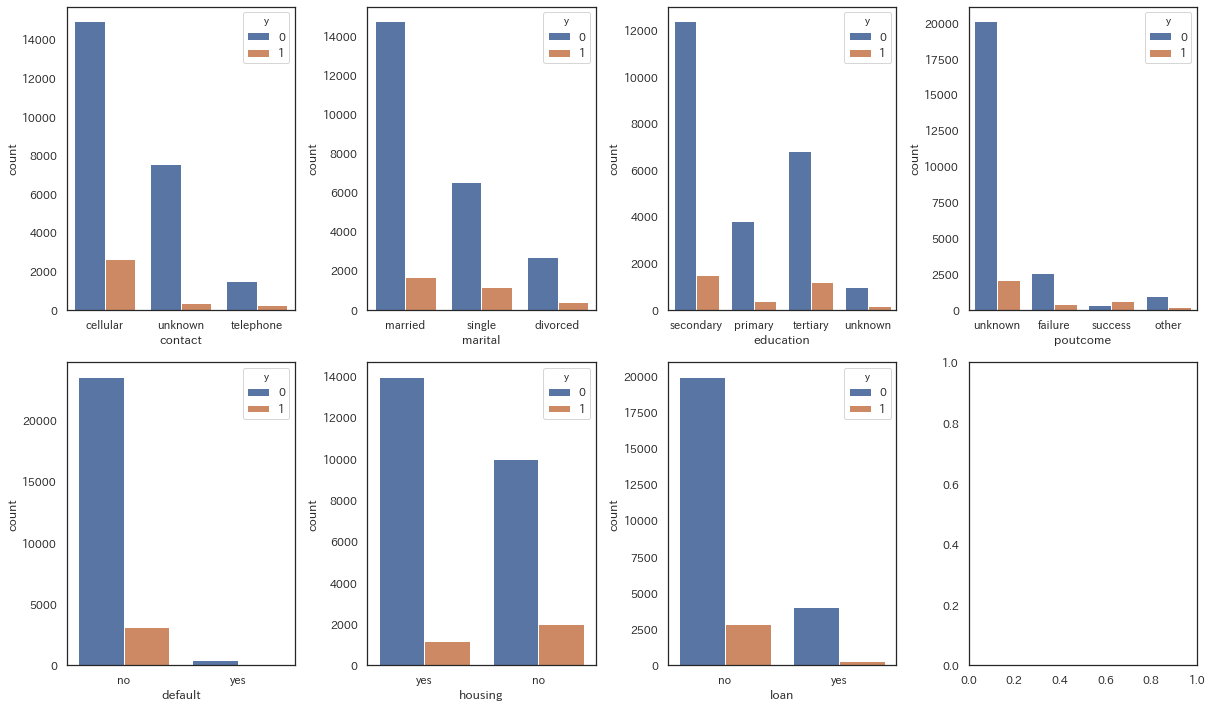

In [14]:
fig, ax = plt.subplots(2,4,figsize=(17,10))
sns.countplot(x="contact",hue="y",data=train,ax=ax[0][0]) #cellular
sns.countplot(x="marital",hue="y",data=train,ax=ax[0][1]) #divorced
sns.countplot(x="education",hue="y",data=train,ax=ax[0][2]) #secondary,tertiary
sns.countplot(x="poutcome",hue="y",data=train,ax=ax[0][3]) #前回のキャンペーンの成果>success
sns.countplot(x="default",hue="y",data=train,ax=ax[1][0]) #債務不履行があるか>no
sns.countplot(x="housing",hue="y",data=train,ax=ax[1][1]) #住宅ローン>no
sns.countplot(x="loan",hue="y",data=train,ax=ax[1][2]) #個人ローン>no
plt.tight_layout()

マッピングとダミー変数化

In [15]:
train['month_num']=train.month.replace({'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12})
train['bussy_month']=train.month_num.apply(lambda x:1 if x in [3,12,9,10] else 0)

train['younger25']=train.age.apply(lambda x: 1 if x<=25 else 0)
train['older60']=train.age.apply(lambda x: 1 if x>=60 else 0)
#train.info()

目的変数選択の為にランダムフォレストで学習

In [16]:
from sklearn.ensemble import RandomForestRegressor as RFR
#学習データの作成　→　Object列と不要な列を落とす
trainX=train.drop(['y', 'month'], axis=1)
trainX=pd.get_dummies(trainX)
trainY=train.y
#学習実行
model=RFR(n_estimators=100)
model.fit(trainX,trainY)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

重要度を可視化

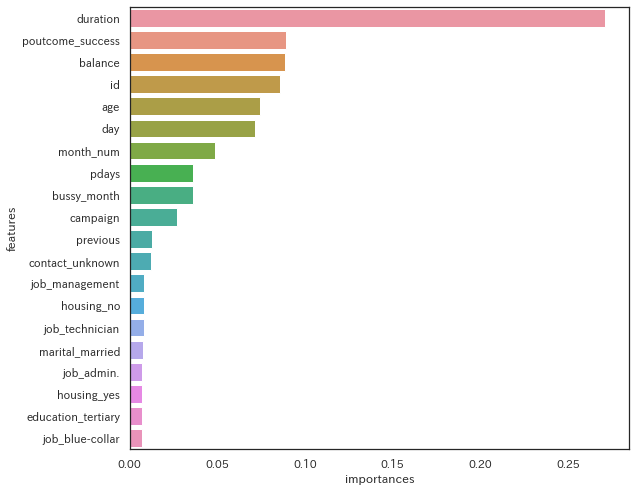

In [17]:
fi = model.feature_importances_
importances = pd.DataFrame({"features":trainX.columns.values, "importances" : fi})
plt.figure(figsize=(9, 7))
sns.barplot(x="importances", y="features", data=importances.sort_values(by="importances", ascending=False)[:20])
plt.tight_layout()

目的変数の決定　→　分類は、下手に絞るより全部乗せのほうがうまくいった

In [18]:
target_cols=['duration','poutcome_success','balance','age','month_num','day','pdays','campaign','contact_cellular','contact_unknown','previous']
trainX=trainX[target_cols]

データの相関を見る

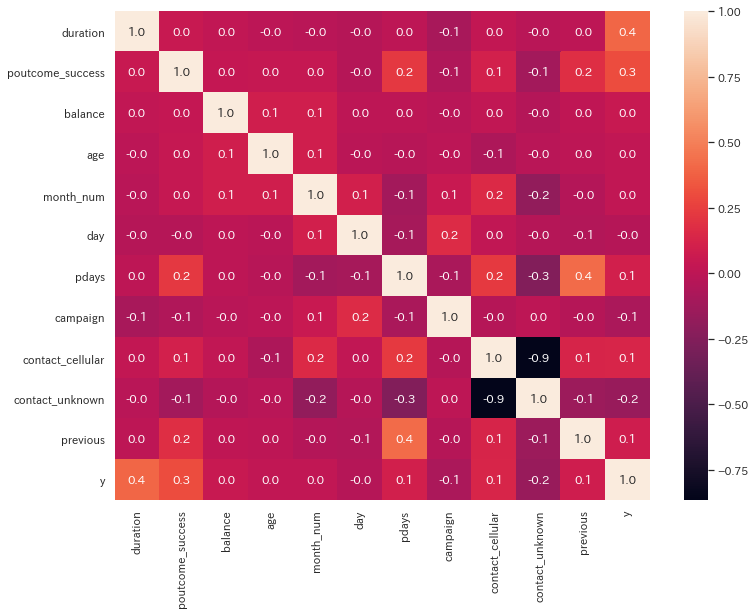

In [19]:
fig, ax = plt.subplots(figsize=(12, 9)) 
check=trainX.copy()
check['y']=trainY
sns.heatmap(check.corr(), annot=True, fmt='.1f')

モデル作成（RandomForestClassifier）

In [20]:
from sklearn.ensemble import RandomForestClassifier as RFC
##パラメータ探索
#modelRFC=RFC(n_estimators=300)
#params={"max_depth":list(range(2,16)), 
#            "min_samples_leaf":[5,10,20,50,100,500],
#            "max_features":[1,None,"auto"]}
#gcvRFC=GridSearchCV(modelRFC, params, cv=10, scoring="roc_auc",n_jobs=-1,return_train_score=True)
#gcvRFC.fit(trainX,trainY)
#print(gcvRFC.best_params_)
#print(gcvRFC.best_score_)
#train_score, test_score=gcvRFC.cv_results_["mean_train_score"], gcv2.cv_results_["mean_test_score"]
#plt.plot(train_score)
#plt.plot(test_score)
##パラメータ探索後
bestparam={'max_depth': 15, 'min_samples_leaf': 10, 'max_features': None, 'n_estimators': 300}
modelRFC=RFC(**bestparam)
modelRFC.fit(trainX, trainY.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

モデル作成（LightGBM）

In [21]:
import optuna.integration.lightgbm as lightgbm_tuner
import lightgbm as lgb
from sklearn.model_selection import train_test_split
#データ準備
x_train, x_test, y_train, y_test = train_test_split(trainX, trainY)
trainLGBM=lightgbm_tuner.Dataset(x_train, y_train)
testLGBM=lightgbm_tuner.Dataset(x_test, y_test)
##パラメータ探索
#params={"objective":"binary","metric":"auc"}
#best_params, tuning_history = dict(), list()
#modelLGBM=lightgbm_tuner.train(params, trainLGBM, valid_sets=testLGBM,
#                             verbose_eval=0,
#                             num_boost_round=1000,
#                             early_stopping_rounds=100,
#                             best_params=best_params,
#                             tuning_history=tuning_history)
##パラメータ探索後
#bestparam={'lambda_l1': 2.0756844481349077, 'lambda_l2': 0.9776816050599929, 'num_leaves': 4, 'feature_fraction': 0.5, 'bagging_fraction': 1.0, 'bagging_freq': 0, 'min_child_samples': 20}
bestparam={}
modelLGBM=lgb.LGBMClassifier(**bestparam)
modelLGBM.fit(trainX,trainY) 

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

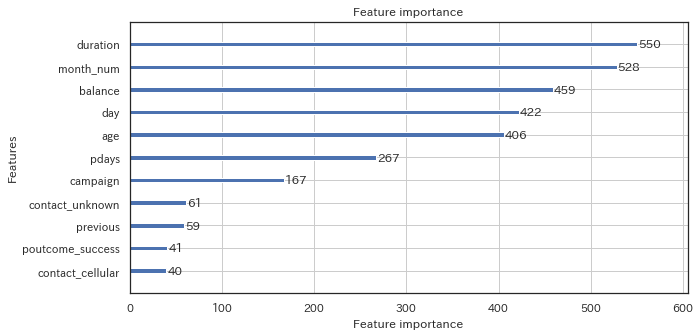

In [22]:
#print(best_params)
#{'lambda_l1': 2.0756844481349077, 'lambda_l2': 0.9776816050599929, 'num_leaves': 4, 'feature_fraction': 0.5, 'bagging_fraction': 1.0, 'bagging_freq': 0, 'min_child_samples': 20}

lgb.plot_importance(modelLGBM, max_num_features=40, figsize =(10,5))

学習データの予測結果評価

RFC : auc 0.7683831260493555 accuracy 0.934385137127691 f1 0.6630064369556986 auc_proba 0.9652656959234879
LGBM : auc 0.7862681855198309 accuracy 0.9333898554998525 f1 0.6761068291808567 auc_proba 0.9635458089462479
['duration' 'poutcome_success' 'balance' 'age' 'month_num' 'day' 'pdays'
 'campaign' 'contact_cellular' 'contact_unknown' 'previous']


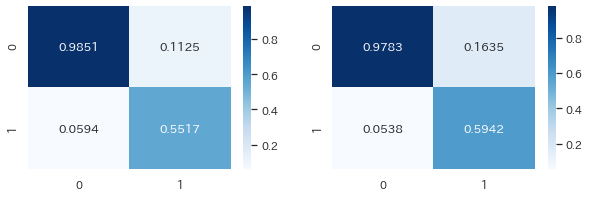

In [23]:
from sklearn import metrics

fig, ax = plt.subplots(1,2, figsize=(10,3))

def get_scores(model_name, y_true, train_data, model): 
    y_predict=model.predict(train_data) #予測
    y_predict_proba=model.predict_proba(train_data)[:,1] #予測（確率）
    #予測結果を評価
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_predict)
    auc=metrics.auc(fpr, tpr)
    accuracy=metrics.accuracy_score(y_true, y_predict)
    recall=metrics.recall_score(y_true, y_predict)
    precision=metrics.precision_score(y_true, y_predict)
    f1=metrics.f1_score(y_true, y_predict)
    cm=metrics.confusion_matrix(y_true, y_predict)
    cm_normalized=cm/cm.astype(np.float).sum(axis=1)
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_predict_proba)
    auc_proba=metrics.auc(fpr, tpr)
    print(model_name,":","auc",auc,"accuracy",accuracy,"f1",f1, "auc_proba",auc_proba) #評価結果を表示
    return cm_normalized #混同行列を返す

cm=get_scores('RFC', train.y, trainX, modelRFC)
sns.heatmap(cm, annot=True, cmap='Blues', ax=ax[0], fmt='.4f')

cm=get_scores('LGBM', train.y, trainX, modelLGBM)
sns.heatmap(cm, annot=True, cmap='Blues', ax=ax[1], fmt='.4f')

print(trainX.columns.values)

テストデータの前処理

In [24]:
test['younger25']=test.age.apply(lambda x: 1 if x<=25 else 0)
test['older60']=test.age.apply(lambda x: 1 if x>=60 else 0)
test['month_num']=test.month.replace({'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12})
test['bussy_month']=test.month_num.apply(lambda x:1 if x in [3,12,9,10] else 0)
test=pd.get_dummies(test)

testX=test[target_cols]
#testX.isnull().sum()
print(trainX.shape, testX.shape)

(27128, 11) (18083, 11)


テストデータで予測をおこない、SIGNATE提出用データ作成

In [25]:
sample=pd.read_csv("submit_sample.csv",header=None)

def output_submit(name, model, test_data):
    pred=model.predict_proba(test_data)
    sample[1]=pred[:,1]
    sample.to_csv("submit_bank_{}.csv".format(name),index=None,header=None)
    print(sample.head())

output_submit('RFC', modelRFC, testX)
output_submit('LGBM', modelLGBM, testX)

   0         1
0  1  0.766112
1  2  0.524928
2  3  0.000564
3  4  0.000660
4  5  0.184049
   0         1
0  1  0.722331
1  2  0.578008
2  3  0.000216
3  4  0.000735
4  5  0.095999
